In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_wrangling_tools import *

In [78]:
DATA_FOLDER = 'data/'
DATA_FILE = '10101.csv'

In [79]:
file = DATA_FOLDER + DATA_FILE
df = pd.read_csv(file)
df

,state,EEGv,EMGv,temp
0,w,3.342858e-09,1.083345e-09,0.0
1,w,3.131613e-09,5.783424e-09,0.0
2,w,3.202955e-09,1.809423e-09,0.0
3,w,3.295155e-09,1.861343e-09,0.0
4,w,3.245190e-09,1.245901e-08,0.0
...,...,...,...,...
86395,w,3.395288e-09,1.120151e-09,0.0
86396,w,3.352272e-09,2.934637e-09,0.0
86397,w,3.579133e-09,9.349616e-10,0.0
86398,w,3.514623e-09,3.741893e-10,0.0


In [80]:
df["state"].value_counts()

w    43448
n    33698
1     5302
r     3663
2      240
3       32
5       17
Name: state, dtype: int64

In [82]:
df1 = df.copy()

def to_hours(tick):
    return tick / 900.0

df1['hours'] = df1.index.map(to_hours)
df1['hours']

numerical_map = {'w': 0, 'n': 1, 'r': 2, 'i': 5, '2': 6, '3': 7, '5': 8}

df1['nstate'] = df1['state'].replace(numerical_map)
df1['nstate'] = df1['nstate'].astype(float)
df1['nstate'].value_counts()

0.0    43448
1.0    39000
2.0     3663
6.0      272
7.0       17
Name: nstate, dtype: int64

0         0.000000
1         0.001111
2         0.002222
3         0.003333
4         0.004444
           ...    
86395    95.994444
86396    95.995556
86397    95.996667
86398    95.997778
86399    95.998889
Name: hours, Length: 86400, dtype: float64

In [103]:
df_day1 = df1[0:21600]
df_day2 = df1[21600:43200]
df_day3 = df1[43200:64800]
df_day4 = df1[64800:86400]

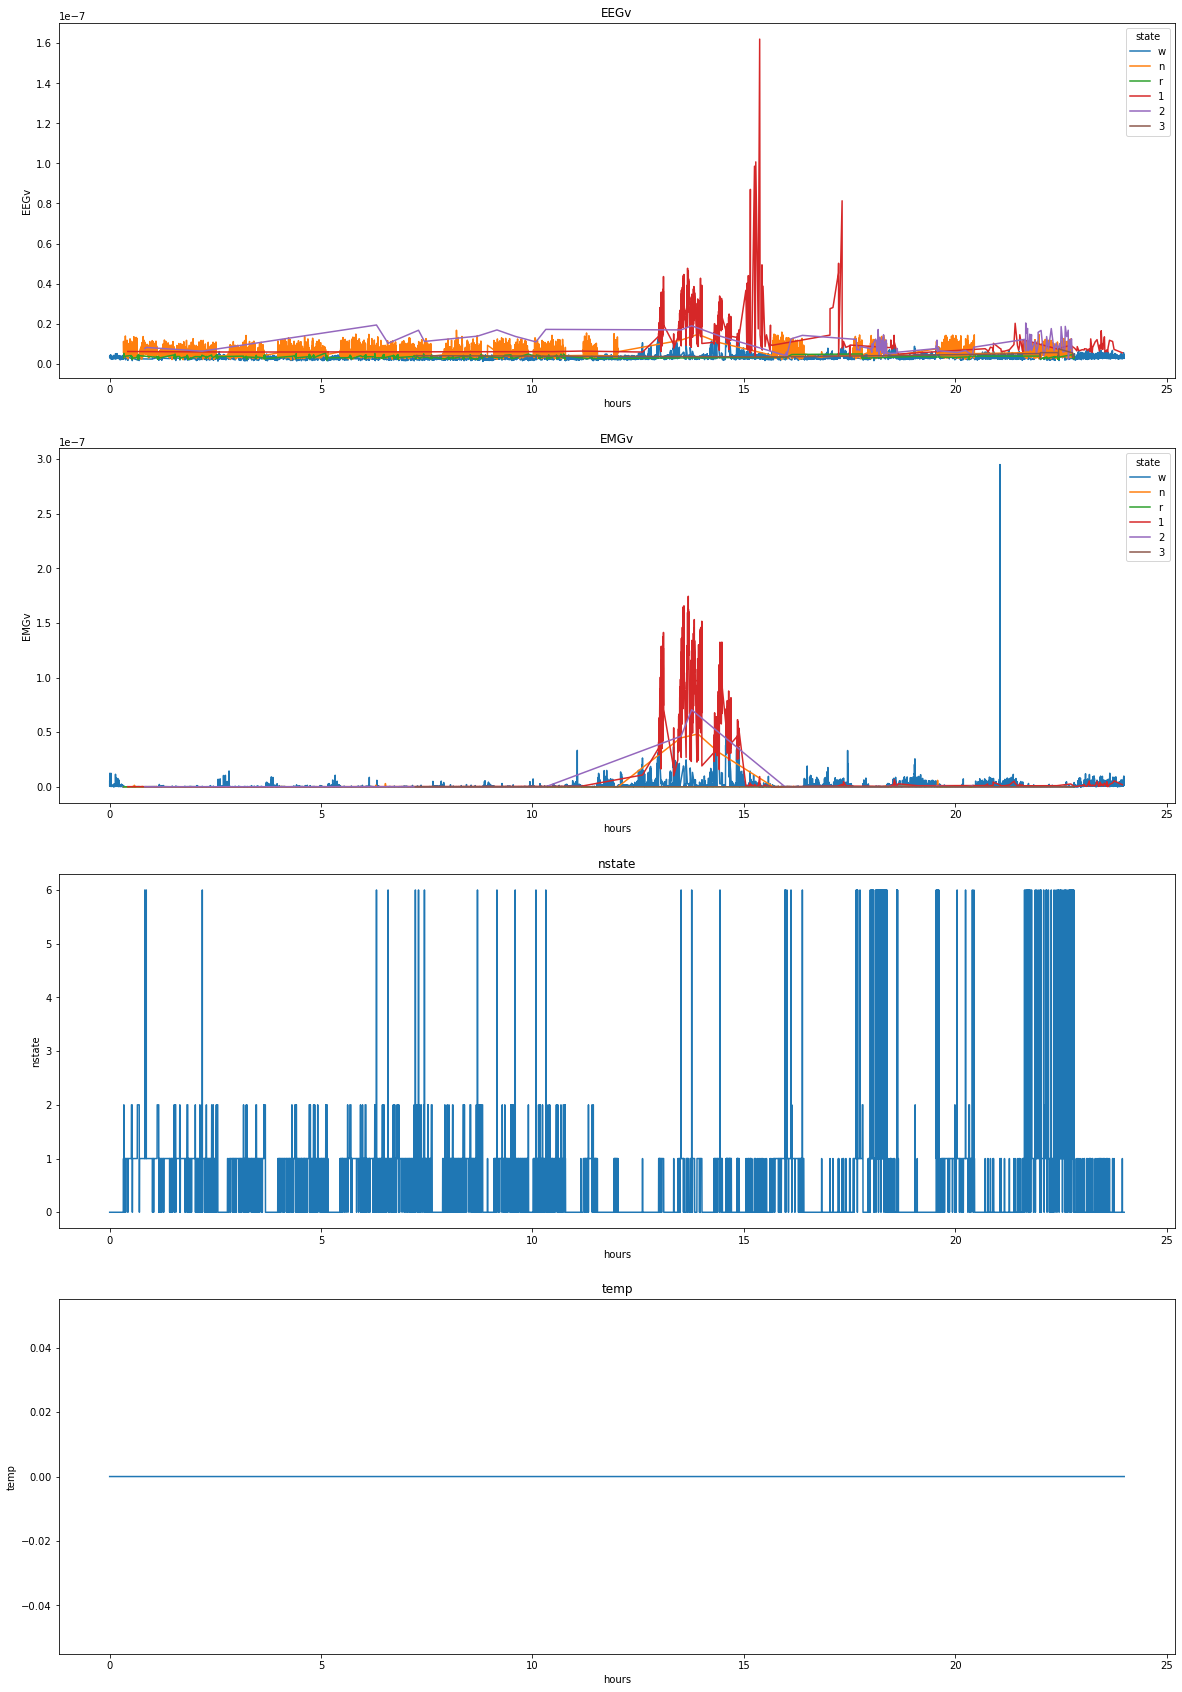

In [131]:
# plot a day of data
def plot_df(df, log=False):
    fig, axs = plt.subplots(4, 1, figsize=(20, 30))

    eeg = sns.lineplot(data = df, x = "hours", y = "EEGv", hue = "state", ax=axs[0])
    axs[0].set_title("EEGv")

    emg = sns.lineplot(data = df, x = "hours", y = "EMGv", hue = "state", ax=axs[1])
    axs[1].set_title("EMGv")

    sns.lineplot(data = df, x = "hours", y = "nstate", ax=axs[2])
    axs[2].set_title("nstate")

    sns.lineplot(data = df, x = "hours", y = "temp", ax=axs[3])
    axs[3].set_title("temp")

    if log:
        eeg.set(yscale="log")
        emg.set(yscale="log")

    plt.show()

plot_df(df_day1, log=False)